Descriptions: The Aim of this project is to visualize a stock price graph first and then make some future predictions for it

Libraries:pandas,yahoo_fin,datetime,plotly,matplotlib,prophet

In [ ]:
import pandas as pd
from yahoo_fin import stock_info
from datetime import date, timedelta

In [2]:
today=date.today()

d2=date.today()-timedelta(days=730)
d2=d2.strftime("%Y-%m-%d")
first_date=d2

d1=today.strftime("%Y-%m-%d")
last_date=d1


print("Start day: "+first_date)
print("End day: "+last_date)

Start day: 2023-02-12
End day: 2025-02-11


In [3]:
symbol = 'NVDA'
data = stock_info.get_data(symbol,start_date=first_date,end_date=last_date)
data["Date"]=data.index
data.reset_index(inplace=True)
data.drop(columns=["ticker","index","adjclose"],inplace=True)
data.tail()


,open,high,low,close,volume,Date
495,116.959999,121.199997,116.699997,118.650002,256550000,2025-02-04
496,121.760002,125.000000,120.760002,124.830002,262230800,2025-02-05
497,127.419998,128.770004,125.209999,128.679993,251483600,2025-02-06
498,129.220001,130.369995,125.000000,129.839996,227369400,2025-02-07
499,130.050003,135.000000,129.970001,133.570007,208623428,2025-02-10


In [4]:
import plotly.express as px

close_price=data["close"]

figure1 = px.line(data, 
                 x=data["Date"], 
                 y=close_price,  # Doğru sütuna erişim
                 title="NVIDIA Price Analysis (Line Plot)")
figure1.show()

In [5]:
import plotly.graph_objects as go
figure2 = go.Figure(data=[go.Candlestick(x = data["Date"],
                                        open = data["open"], 
                                        high = data["high"],
                                        low = data["low"], 
                                        close = data["close"])])
figure2.update_layout(title = "NVIDIA Price Analysis (Candlestick Chart)", 
                     xaxis_rangeslider_visible = False)
figure2.show()

In [6]:
figure = go.Figure(data=[go.Candlestick(x = data["Date"],
                                        open = data["open"], 
                                        high = data["high"],
                                        low = data["low"], 
                                        close = data["close"])])

figure.update_layout(title = "NVIDIA Price Analysis (Interactive)")

figure.update_xaxes(
    rangeslider_visible = True,
    rangeselector = dict(
        buttons = list([
            dict(count = 1, label = "1m", step = "month", stepmode = "backward"),
            dict(count = 6, label = "6m", step = "month", stepmode = "backward"),
            dict(count = 1, label = "YTD", step = "year", stepmode = "todate"),
            dict(count = 1, label = "1y", step = "year", stepmode = "backward"),
            dict(step = "all")
        ])
    )
)
figure.show()

00:12:10 - cmdstanpy - INFO - Chain [1] start processing
00:12:10 - cmdstanpy - INFO - Chain [1] done processing


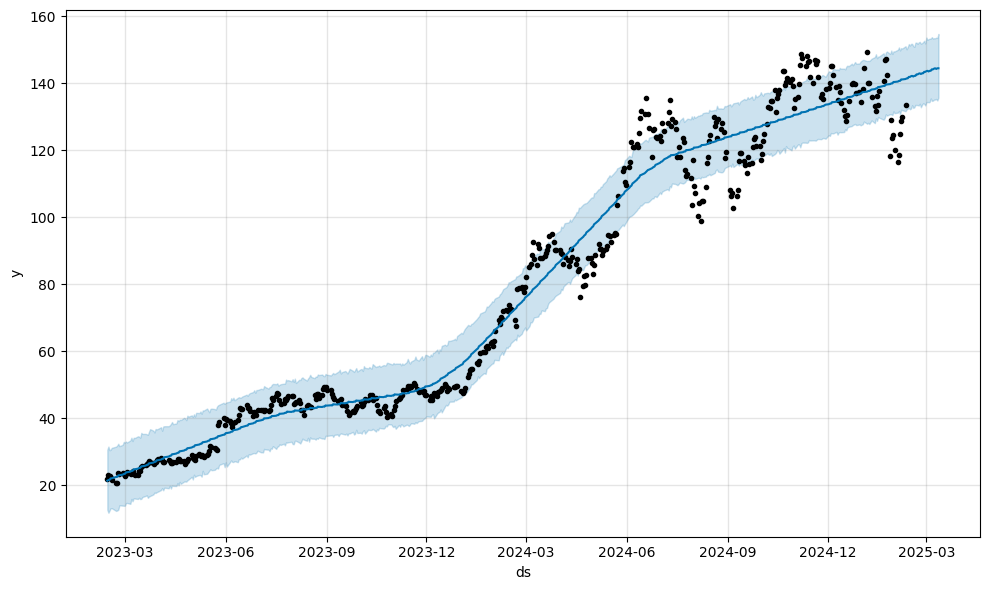

In [7]:
from prophet import Prophet
import matplotlib.pyplot as plt

df = data[["Date", "close"]]
df.columns = ["ds", "y"] 

model = Prophet()
model.fit(df)

future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)

model.plot(forecast)
plt.show()